In [1]:
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import sys
sys.path.append("..")
%cd ..


/Users/AsgerSturisTang/OneDrive - Danmarks Tekniske Universitet/DTU/6. Semester/Bachelor2021


In [2]:
from DataPrep.ImportData import importer
from Modelling import modelling
import keras
from keras import Sequential, Model
from keras.layers import Dense, LSTM, Dropout, Input, Reshape
import pyforest
import torch
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error



In [3]:
m = modelling()
df = m.df.drop(columns=["Start Date","Charging Time (mins)", "Total Duration (mins)", "Port Number"])

In [4]:
cols_to_standardize = ['# Professional & Other Places', '# Food', '# Shop & Service',
       '# Travel & Transport', '# Outdoors & Recreation',
       '# Arts & Entertainment', '# Nightlife Spot', '# Residence',
       '# College & University', '# Event']

In [5]:
sc = StandardScaler()
stand_poi = sc.fit_transform(df[cols_to_standardize])

In [6]:
stand_poi = pd.DataFrame(stand_poi, index=df.index, columns=cols_to_standardize)

In [7]:
for i in cols_to_standardize:
    df[i] = stand_poi[i]

In [8]:
df["Label"] = df["Label"] + 1

In [15]:
#df = df.drop(columns=cols_to_standardize)

In [9]:
df = df.fillna(0)

In [10]:
df["Energy (kWh)"]

0        1.679882
1        1.899242
2        1.574471
3        1.982032
4        2.232860
           ...   
17276    4.018583
17277    4.247111
17278    2.646125
17279    4.348600
17280    3.383808
Name: Energy (kWh), Length: 17281, dtype: float64

In [11]:
first_entry = df["Energy (kWh)"].iloc[0]
df["Energy (kWh)"] = df["Energy (kWh)"].diff()
df = df.dropna()
first_diff = df["Energy (kWh)"].iloc[0]
df["Energy (kWh)"] = df["Energy (kWh)"].diff()
df = df.dropna()


In [12]:
print(first_entry, first_diff)

1.6798819394841271 0.21935985734126962


In [13]:

df.Label.unique()

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [14]:
df = df.dropna()

In [22]:
#df["Energy (kWh)"] = np.log(df["Energy (kWh)"])

In [15]:
X_train,X_test, X_val,y_train,y_test, y_val = m.ttsplit(df)

In [16]:
X_train.columns

Index(['Label', 'CenterLon', 'CenterLat', 'Level 1', 'Level 2',
       'Energy (kWh)_lag1', 'Energy (kWh)_lag2', 'Energy (kWh)_lag3',
       'Energy (kWh)_lag4', 'Energy (kWh)_lag5',
       '# Professional & Other Places', '# Food', '# Shop & Service',
       '# Travel & Transport', '# Outdoors & Recreation',
       '# Arts & Entertainment', '# Nightlife Spot', '# Residence',
       '# College & University', '# Event', 'Cluster_0.0', 'Cluster_1.0',
       'Cluster_2.0', 'Cluster_3.0', 'Cluster_4.0', 'Cluster_5.0',
       'Cluster_6.0', 'Cluster_7.0', 'Month_Day_1', 'Month_Day_2',
       'Month_Day_3', 'Month_Day_4', 'Month_Day_5', 'Month_Day_6',
       'Month_Day_7', 'Month_Day_8', 'Month_Day_9', 'Month_Day_10',
       'Month_Day_11', 'Month_Day_12', 'Month_Day_13', 'Month_Day_14',
       'Month_Day_15', 'Month_Day_16', 'Month_Day_17', 'Month_Day_18',
       'Month_Day_19', 'Month_Day_20', 'Month_Day_21', 'Month_Day_22',
       'Month_Day_23', 'Month_Day_24', 'Month_Day_25', 'Month_Day

In [17]:
df.groupby("Label").agg({"Energy (kWh)":["mean", "std"]})

Energy (kWh)          
              mean       std
Label                       
1.0      -0.000097  0.935690
2.0       0.000062  1.177511
3.0      -0.000062  0.807430
4.0       0.000582  1.836464
5.0      -0.001285  1.335211
6.0       0.000893  0.956794
7.0      -0.000344  1.099691
8.0      -0.000423  1.510294

In [18]:
labels = df.Label.unique()

In [19]:
labels

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [20]:
stackings_X_test = []
stackings_X_train = []
stackings_X_val = []
stackings_y_test = []
stackings_y_train = []
stackings_y_val = []
for l in labels:
    stackings_X_test.append(tf.ragged.constant(X_test[X_test.Label == l]))
    stackings_y_test.append((tf.ragged.constant(y_test[X_test.Label == l])))
    stackings_X_train.append((tf.ragged.constant(X_train[X_train.Label == l])))
    stackings_y_train.append((tf.ragged.constant(y_train[X_train.Label == l])))
    stackings_X_val.append((tf.ragged.constant(X_val[X_val.Label == l])))
    stackings_y_val.append((tf.ragged.constant(y_val[X_val.Label == l])))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
X_train_stack = tf.ragged.stack(stackings_X_train).to_tensor()
X_test_stack =  tf.ragged.stack(stackings_X_test).to_tensor()
X_val_stack =tf.ragged.stack(stackings_X_val).to_tensor()
y_train_stack = tf.ragged.stack(stackings_y_train).to_tensor()
y_test_stack = tf.ragged.stack(stackings_y_test).to_tensor()
y_val_stack = tf.ragged.stack(stackings_y_val).to_tensor()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
from datetime import datetime
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

inputs = Input(shape=(None,80))
x = LSTM(68, return_sequences = True, activation = "tanh")(inputs)
x = Dropout(0.2)(x)
x = LSTM(42, return_sequences = True, activation = "tanh")(x)
x = Dropout(0.5)(x)
x = Dense(10, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(1)(x)


m = keras.Model(inputs=inputs, outputs=outputs, name="LSTM_model")

m.compile(optimizer="adam", loss='mse', metrics=["mae"])

history = m.fit(tf.transpose(X_train_stack, perm = [1,0,2]), tf.transpose(y_train_stack, perm = [1,0]), epochs=200 , batch_size=16, validation_data=(tf.transpose(X_val_stack, perm = [1,0,2]), tf.transpose(y_val_stack, perm = [1,0])), callbacks=tensorboard_callback)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/200
138/138 [==============================] - 13s 44ms/step - loss: 1.0621 - mae: 0.6553 - val_loss: 0.9754 - val_mae: 0.5931
Epoch 2/200
138/138 [==============================] - 2s 15ms/step - loss: 1.0494 - mae: 0.6250 - val_loss: 0.9752 - val_mae: 0.5922
Epoch 3/200
138/138 [==============================] - 2s 15ms/step - loss: 1.0497 - mae: 0.6254 - val_loss: 0.9753 - val_mae: 0.5921
Epoch 4/200
138/138 [==============================] - 2s 14ms/step - loss: 1.0451 - mae: 0.6317 - val_loss: 0.9752 - val_mae: 0.5922
Epoch 5/200
138/138 [==============================] - 2s 15ms/step - loss: 1.0547 - mae: 0.6312 - val_loss: 0.9751 - val_mae: 0.5932
Epoch 6/200
138/138 [==============================] - 2s 14ms/step - loss: 0.9830 - mae: 0.6118 - val_loss: 0.9753 - val_mae: 0.5924
Epoch 7/200
138/138 [==============================] - 2s 15ms/step - loss: 1.0213 - mae: 0.6255 - val_loss: 0.9752 - val_mae: 0.5927
Epoch 8/200
138/138 [==============================] - 2s 14m

In [23]:
def smape(A, F):
    return 100/len(A) * np.sum( np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [24]:
def predict(cluster, model):
    s = y_val_stack[cluster][y_val_stack[cluster] != 0].shape[0]
    y_pred = model.predict(np.array(X_val_stack[cluster][y_val_stack[cluster] != 0]).reshape(s,1,80)).flatten()
    y_val = np.array(y_val_stack[cluster][y_val_stack[cluster] != 0]).flatten()
    outstring = f"Cluster: {cluster}\nR^2: {r2_score(y_val,y_pred)}\nRMSE:{np.sqrt(mean_squared_error(y_val,y_pred))}\nMAPE:{mean_absolute_percentage_error(y_val,y_pred)}\n"
    outstring += f"MAE: {mean_absolute_error(y_val,y_pred)}\nsMAPE: {smape(y_val,y_pred)}"
    print(outstring)

    plt.plot(y_val)
    plt.plot(y_pred)
    plt.show()



In [25]:
X_test.shape

(3456, 80)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

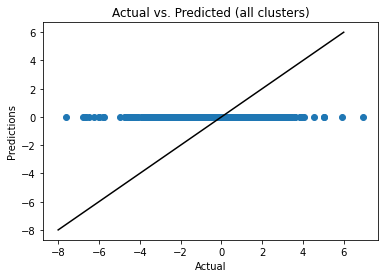

In [25]:
plt.scatter(y_test,np.array(m.predict(np.array(X_test).reshape(3456,1,80))).flatten())
plt.title("Actual vs. Predicted (all clusters)")
plt.ylabel("Predictions")
plt.xlabel("Actual")
x = np.linspace(-8,6,100)
plt.plot(x,x, c = "black")
plt.show()

In [26]:
r2_score(y_test,np.array(m.predict(np.array(X_test).reshape(3456,1,80))).flatten())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-0.00032716894716933176

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 0
R^2: -0.003490906039277153
RMSE:0.8144005655058494
MAPE:0.9992217111189896
MAE: 0.6456677594952405
sMAPE: 99.46259092983111


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

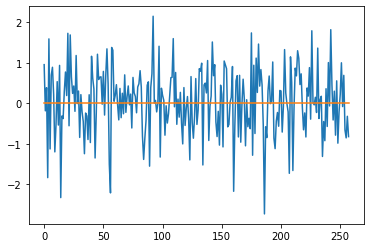

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 1
R^2: -0.0005418686167586451
RMSE:1.176739298866114
MAPE:0.9995067844502111
MAE: 0.9053337050466381
sMAPE: 99.71998609789829


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

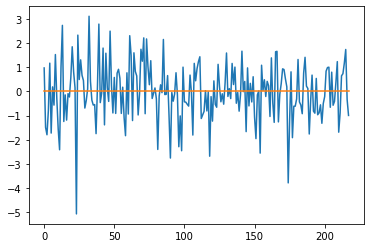

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 2
R^2: -0.00011214516691149257
RMSE:0.8268175247082836
MAPE:0.9985105103347839
MAE: 0.6333512534420506
sMAPE: 99.37337029273044


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

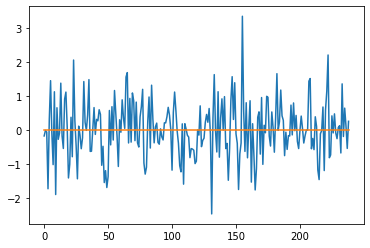

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 3
R^2: -2.05306646157144e-05
RMSE:1.9018464540388382
MAPE:0.9993385121450229
MAE: 1.4581472966143731
sMAPE: 99.72577381934722


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

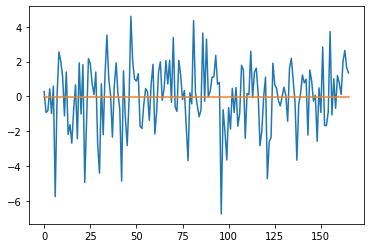

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 4
R^2: -0.006029486152432595
RMSE:1.2947742278980658
MAPE:0.9983165503984418
MAE: 1.0011782366387685
sMAPE: 99.55101359979507


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

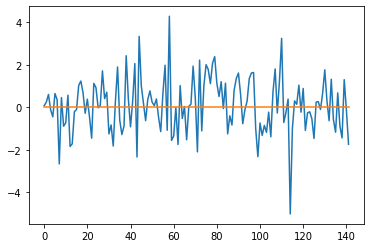

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 5
R^2: -0.0007427276526423832
RMSE:0.947845492301572
MAPE:1.0010543647760515
MAE: 0.7561696580038122
sMAPE: 99.83718073312835


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

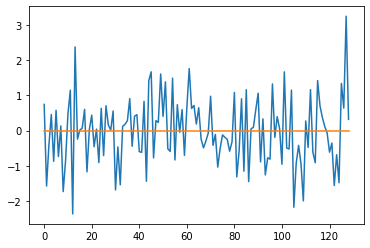

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 6
R^2: -0.011347537762627535
RMSE:1.224895258706986
MAPE:0.9955915294822874
MAE: 0.8602864232177105
sMAPE: 99.15510176114635


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

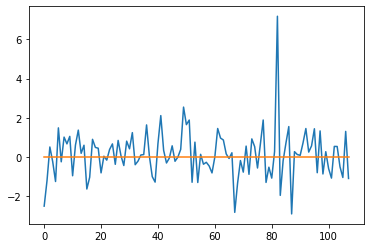

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 7
R^2: -0.0012095380324175231
RMSE:1.454444749463435
MAPE:1.0002691523216418
MAE: 1.073158600238577
sMAPE: 99.83612137157456


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

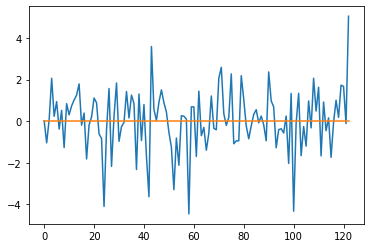

In [27]:
for i in range(8):
    predict(i,m)

In [28]:
def predict_test(cluster,model):
    s = y_test_stack[cluster][y_test_stack[cluster] != 0].shape[0]
    y_pred = model.predict(np.array(X_test_stack[cluster][y_test_stack[cluster] != 0]).reshape(s,1,80)).flatten()
    y_test = np.array(y_test_stack[cluster][y_test_stack[cluster] != 0]).flatten()
    outstring = f"Cluster: {cluster}\nR^2: {r2_score(y_test,y_pred)}\nRMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}\nMAPE:{mean_absolute_percentage_error(y_test,y_pred)}\n"
    outstring += f"MAE: {mean_absolute_error(y_test,y_pred)}\nsMAPE: {smape(y_test,y_pred)}"
    print(outstring)

    plt.plot(y_test)
    plt.plot(y_pred)
    plt.show()


## Bayesian Hyperparamter Tuning

In [29]:
import kerastuner as kt

In [30]:
def model_builder_seq(hp):
    model = Sequential()
    
    for i in range(hp.Int('LSTM_layers',1,3)):
        model.add(LSTM(hp.Int(f'lstm{i}_units', min_value=10, max_value=80, step=5), return_sequences = True, activation = "tanh"))
        model.add(Dropout(hp.Float(f'lstm{i}_dropout', min_value=0, max_value=0.9, step=0.1)))
    
    for i in range(hp.Int('Dense_layers',1,3)):
        model.add(LSTM(hp.Int(f'dense{i}_units', min_value=5, max_value=65, step=5), return_sequences = True, activation = "tanh"))
        model.add(Dropout(hp.Float(f'dense{i}_dropout', min_value=0, max_value=0.9, step=0.1)))
    
    model.add(Dense(1))
    opt = 
    model.compile(optimizer=opt, loss = 'mse', metrics=['mae'])
    
    return model

In [32]:
def model_builder(hp):

    inputs = Input(shape=(None,80))
    
    x = LSTM(hp.Int('lstm0_units', min_value=20, max_value=60, step=2), return_sequences = True, activation = "tanh")(inputs)
    x = Dropout(hp.Float(f'lstm0_dropout', min_value=0, max_value=0.9, step=0.1))(x)

    for i in range(hp.Int('LSTM_layers',1,2)):
        x = LSTM(hp.Int(f'lstm{i + 1}_units', min_value=4, max_value=38, step=2), return_sequences = True, activation = "tanh")(x)
        x = Dropout(hp.Float(f'lstm{i + 1}_dropout', min_value=0, max_value=0.9, step=0.1))(x)
    
    for i in range(hp.Int('Dense_layers',1,3)):
        x = Dense(hp.Int(f'dense_units_{i}', min_value=1, max_value=15, step=1), activation="relu")(x)
        x = Dropout(hp.Float(f'dense{i}_dropout', min_value=0, max_value=0.9, step=0.1))(x)


    outputs = Dense(1)(x)

    m = keras.Model(inputs=inputs, outputs=outputs, name="LSTM_model")

    m.compile(optimizer="adam", loss='mse', metrics=["mae"])

    return m

In [31]:
tuner = kt.BayesianOptimization(model_builder_seq,
                     objective='val_mae',
                     max_trials = 100,
                     directory='Modelling/HyperParameterTuning',
                     project_name='LSTM_hp_tuning_sequential')

INFO:tensorflow:Reloading Oracle from existing project Modelling/HyperParameterTuning/LSTM_hp_tuning_sequential/oracle.json
INFO:tensorflow:Reloading Tuner from Modelling/HyperParameterTuning/LSTM_hp_tuning_sequential/tuner0.json


In [32]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

<IPython.core.display.Javascript object>

In [33]:
tuner.search(tf.transpose(X_train_stack, perm = [1,0,2]), tf.transpose(y_train_stack, perm = [1,0]), epochs=200 , batch_size=16, validation_data=(tf.transpose(X_val_stack, perm = [1,0,2]), tf.transpose(y_val_stack, perm = [1,0])), callbacks=[stop_early])


# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 33 Complete [00h 03m 32s]
val_mae: 0.272393137216568

Best val_mae So Far: 0.2662185728549957
Total elapsed time: 02h 14m 18s
INFO:tensorflow:Oracle triggered exit


In [43]:
best_hps.values

{'LSTM_layers': 1,
 'lstm0_units': 60,
 'lstm0_dropout': 0.0,
 'Dense_layers': 1,
 'dense0_units': 15,
 'dense0_dropout': 0.0,
 'learning_rate': 0.0021215853150254793,
 'lstm1_units': 80,
 'lstm1_dropout': 0.0,
 'lstm2_units': 10,
 'lstm2_dropout': 0.9,
 'dense1_units': 35,
 'dense1_dropout': 0.8,
 'dense2_units': 65,
 'dense2_dropout': 0.0}

In [49]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(tf.transpose(X_train_stack, perm = [1,0,2]), tf.transpose(y_train_stack, perm = [1,0]), epochs=200 , batch_size=16, validation_data=(tf.transpose(X_val_stack, perm = [1,0,2]), tf.transpose(y_val_stack, perm = [1,0])))



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/200
138/138 [==============================] - 6s 16ms/step - loss: 1.0560 - mae: 0.6509 - val_loss: 0.9413 - val_mae: 0.5861
Epoch 2/200
138/138 [==============================] - 1s 8ms/step - loss: 0.8883 - mae: 0.5885 - val_loss: 0.5575 - val_mae: 0.4942
Epoch 3/200
138/138 [==============================] - 1s 8ms/step - loss: 0.3025 - mae: 0.3555 - val_loss: 0.2350 - val_mae: 0.2991
Epoch 4/200
138/138 [==============================] - 1s 8ms/step - loss: 0.2429 - mae: 0.3168 - val_loss: 0.2302 - val_mae: 0.3023
Epoch 5/200
138/138 [==============================] - 1s 8ms/step - loss: 0.2289 - mae: 0.3003 - val_loss: 0.2310 - val_mae: 0.2938
Epoch 6/200
138/138 [==============================] - 1s 7ms/step - loss: 0.2366 - mae: 0.3072 - val_loss: 0.2560 - val_mae: 0.3319
Epoch 7/200
138/138 [==============================] - 1s 8ms/step - loss: 0.2293 - mae: 0.2956 - val_loss: 0.2202 - val_mae: 0.2962
Epoch 8/200
138/138 [==============================] - 1s 8ms/step -

In [50]:
val_mae_per_epoch = history.history['val_mae']
best_epoch = val_mae_per_epoch.index(min(val_mae_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 46


In [65]:
hypermodel = tuner.hypermodel.build(best_hps)

In [52]:
hypermodel.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [85]:
hypermodel.save("FinalRNN")

INFO:tensorflow:Assets written to: FinalRNN/assets
INFO:tensorflow:Assets written to: FinalRNN/assets


In [66]:
hypermodel.fit(tf.transpose(X_train_stack, perm = [1,0,2]), tf.transpose(y_train_stack, perm = [1,0]), epochs=100 , batch_size=16, validation_data=(tf.transpose(X_val_stack, perm = [1,0,2]), tf.transpose(y_val_stack, perm = [1,0])), callbacks = [stop_early])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/100
138/138 [==============================] - 6s 17ms/step - loss: 1.0228 - mae: 0.6372 - val_loss: 0.9738 - val_mae: 0.6057
Epoch 2/100
138/138 [==============================] - 1s 9ms/step - loss: 0.9892 - mae: 0.6264 - val_loss: 0.7393 - val_mae: 0.5232
Epoch 3/100
138/138 [==============================] - 1s 10ms/step - loss: 0.5985 - mae: 0.4820 - val_loss: 0.2635 - val_mae: 0.3042
Epoch 4/100
138/138 [==============================] - 1s 9ms/step - loss: 0.2765 - mae: 0.3270 - val_loss: 0.2405 - val_mae: 0.2994
Epoch 5/100
138/138 [==============================] - 1s 9ms/step - loss: 0.2251 - mae: 0.2928 - val_loss: 0.2420 - val_mae: 0.3076
Epoch 6/100
138/138 [==============================] - 1s 9ms/step - loss: 0.2264 - mae: 0.2995 - val_loss: 0.2289 - val_mae: 0.2955
Epoch 7/100
138/138 [==============================] - 1s 9ms/step - loss: 0.2334 - mae: 0.2967 - val_loss: 0.2893 - val_mae: 0.3594
Epoch 8/100
138/138 [==============================] - 1s 10ms/step

In [97]:
best_hps.values

{'lstm0_units': 20,
 'lstm0_dropout': 0.0,
 'LSTM_layers': 1,
 'lstm1_units': 38,
 'lstm1_dropout': 0.0,
 'Dense_layers': 1,
 'dense_units_0': 15,
 'dense0_dropout': 0.0,
 'dense_units_1': 15,
 'dense1_dropout': 0.0,
 'lstm2_units': 4,
 'lstm2_dropout': 0.9,
 'dense_units_2': 1,
 'dense2_dropout': 0.9}

In [105]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

inputs = Input(shape=(None,80))
x = LSTM(20, return_sequences = True, activation = "tanh")(inputs)
x = Dropout(0.0)(x)
x = LSTM(38, return_sequences = True, activation = "tanh")(x)
x = Dropout(0.0)(x)
x = Dense(15, activation="relu")(x)
x = Dropout(0.0)(x)
outputs = Dense(1)(x)

m_bayes = keras.Model(inputs=inputs, outputs=outputs, name="LSTM_model")

m_bayes.compile(optimizer="adam", loss='mse', metrics=["mae"])
m_bayes.fit(tf.transpose(X_train_stack, perm = [1,0,2]), tf.transpose(y_train_stack, perm = [1,0]), epochs=50 , batch_size=16, validation_data=(tf.transpose(X_val_stack, perm = [1,0,2]), tf.transpose(y_val_stack, perm = [1,0])), callbacks=[tensorboard_callback, stop_early])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/50
138/138 [==============================] - 7s 21ms/step - loss: 0.9896 - mae: 0.6338 - val_loss: 0.9663 - val_mae: 0.5961
Epoch 2/50
138/138 [==============================] - 1s 10ms/step - loss: 1.0416 - mae: 0.6271 - val_loss: 0.6570 - val_mae: 0.5111
Epoch 3/50
138/138 [==============================] - 1s 9ms/step - loss: 0.5557 - mae: 0.4864 - val_loss: 0.3143 - val_mae: 0.3520
Epoch 4/50
138/138 [==============================] - 1s 9ms/step - loss: 0.2756 - mae: 0.3348 - val_loss: 0.2863 - val_mae: 0.3647
Epoch 5/50
138/138 [==============================] - 1s 9ms/step - loss: 0.2523 - mae: 0.3263 - val_loss: 0.2398 - val_mae: 0.2997
Epoch 6/50
138/138 [==============================] - 1s 9ms/step - loss: 0.2333 - mae: 0.3088 - val_loss: 0.2261 - val_mae: 0.2893
Epoch 7/50
138/138 [==============================] - 1s 9ms/step - loss: 0.2380 - mae: 0.3013 - val_loss: 0.3733 - val_mae: 0.3890
Epoch 8/50
138/138 [==============================] - 1s 9ms/step - loss: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

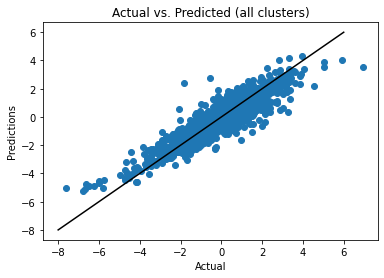

In [67]:
plt.scatter(y_test,np.array(hypermodel.predict(np.array(X_test).reshape(3456,1,80))).flatten())
plt.title("Actual vs. Predicted (all clusters)")
plt.ylabel("Predictions")
plt.xlabel("Actual")
x = np.linspace(-8,6,100)
plt.plot(x,x, c = "black")
plt.show()

In [68]:
r2_score(y_test,np.array(hypermodel.predict(np.array(X_test).reshape(3456,1,80))).flatten())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.8007963965637757

In [73]:
X_val.shape

(1383, 80)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 0
R^2: 0.7620832366713556
RMSE:0.3965462684691271
MAPE:2.225159308802965
MAE: 0.3254589736445028
sMAPE: 40.23929966802481


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

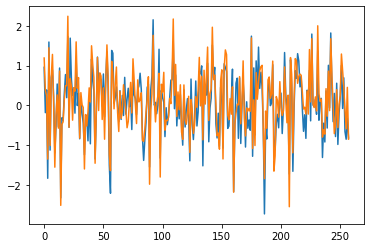

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 1
R^2: 0.8164277301058003
RMSE:0.5040413466385135
MAPE:1.4895017375566795
MAE: 0.38839298390338095
sMAPE: 36.788191642450286


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

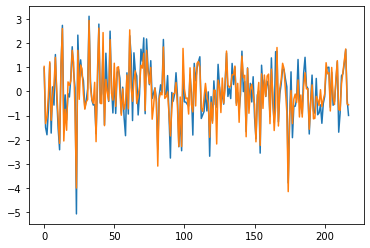

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 2
R^2: 0.7209248200809649
RMSE:0.436763089271574
MAPE:2.3424682697771115
MAE: 0.3090639185722765
sMAPE: 42.03027172981758


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

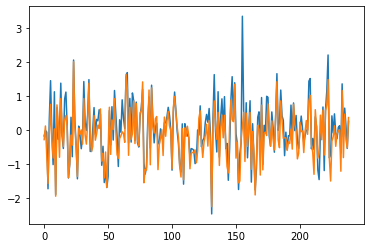

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 3
R^2: 0.7678133759802719
RMSE:0.9164095186518417
MAPE:1.62849582885435
MAE: 0.7023963874093918
sMAPE: 38.86959326979861


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

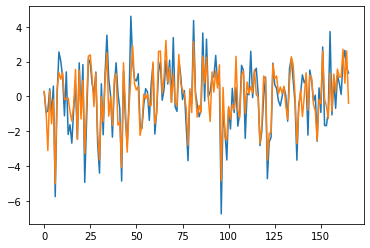

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 4
R^2: 0.7625259348115817
RMSE:0.6290668283430282
MAPE:1.6353606307122546
MAE: 0.46891552494665156
sMAPE: 37.31024046775504


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

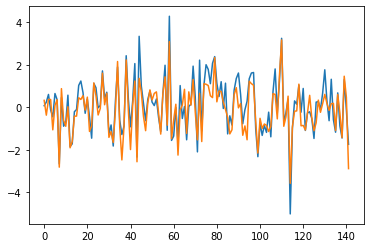

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 5
R^2: 0.7582026875480345
RMSE:0.4659100325897674
MAPE:1.3878256196530883
MAE: 0.3483071941492212
sMAPE: 36.67746183473485


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

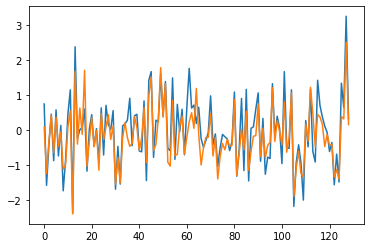

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 6
R^2: 0.7873829180573182
RMSE:0.5616267948899922
MAPE:3.6661569489141392
MAE: 0.3931804344144034
sMAPE: 37.62021458715677


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

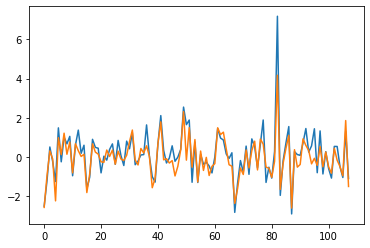

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 7
R^2: 0.8409509397492925
RMSE:0.5796959854245481
MAPE:1.2714591470270318
MAE: 0.45107865227878213
sMAPE: 36.78317761495991


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

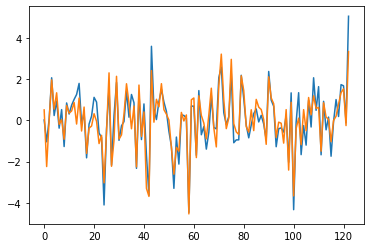

In [69]:
for i in range(8):
    predict(i,hypermodel)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 0
R^2: 0.7923125355974397
RMSE:0.3981081913901496
MAPE:2.278619764354553
MAE: 0.3075534369773277
sMAPE: 36.55978432102409


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

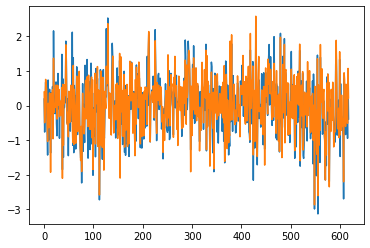

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 1
R^2: 0.8311212393864624
RMSE:0.4914825068750725
MAPE:1.757135700204834
MAE: 0.36980909443595006
sMAPE: 33.93545833102307


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

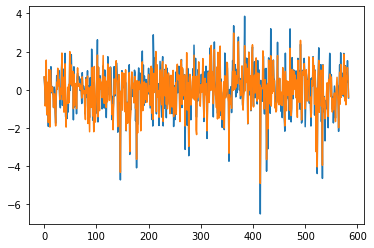

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 2
R^2: 0.7148155200192867
RMSE:0.40301041861687353
MAPE:3.9927284859195313
MAE: 0.31321415703307964
sMAPE: 40.79010155183403


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

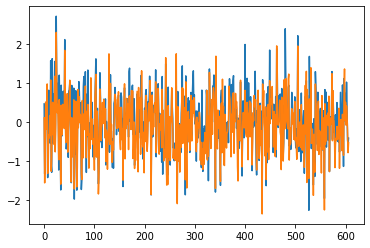

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 3
R^2: 0.7982803734116186
RMSE:0.8150692696609688
MAPE:1.5135164059656756
MAE: 0.6150807216424551
sMAPE: 36.74415152512309


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

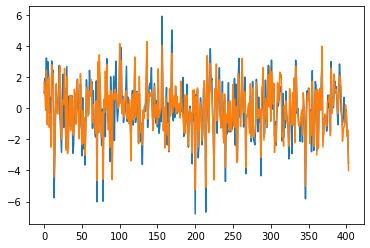

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 4
R^2: 0.8231202928314574
RMSE:0.6025178632163384
MAPE:0.9952371879796218
MAE: 0.45032639641177813
sMAPE: 37.19694314929448


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

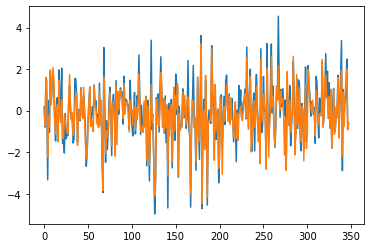

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 5
R^2: 0.7274474847139449
RMSE:0.4612504350939629
MAPE:2.890543421592768
MAE: 0.37408069350949047
sMAPE: 43.85197692567147


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

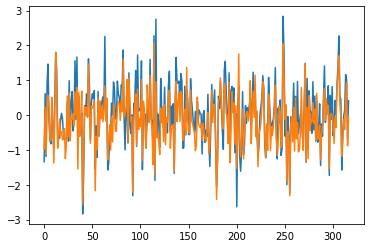

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 6
R^2: 0.7723046220104575
RMSE:0.5267382870964147
MAPE:1.1151693427349674
MAE: 0.3820755051637996
sMAPE: 38.47439496289299


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

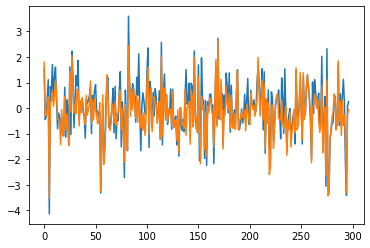

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cluster: 7
R^2: 0.8299846594363444
RMSE:0.6822928623859974
MAPE:1.1791798431102587
MAE: 0.48232460751903955
sMAPE: 36.58702894609114


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

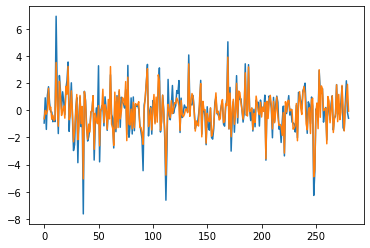

In [71]:
for i in range(8):
    predict_test(i,hypermodel)

## Return to normal

In [145]:
def toNormal(target, original, training):

    target = pd.DataFrame(target, index = training.index)
    training = training.sort_index()
    target = target.sort_index()

    min_index = target.index.min()
    diff = original.iloc[min_index - 1]
    first_org_value = original.iloc[min_index - 2]
    diff = diff - first_org_value

    target.loc[1] = diff
    print(target)
    target = target.sort_index()
    print(target)
    target = target.cumsum()
    print(target)
    target.loc[0] = first_org_value
    target = target.sort_index()

    training.loc[1] = diff
    training = training.sort_index()
    training = training.cumsum()
    training.loc[0] = first_org_value
    training = training.sort_index()

    return target.cumsum(), training.cumsum()
        


In [81]:
y_pred=np.array(hypermodel.predict(np.array(X_test).reshape(3456,1,80))).flatten()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
y_pred

array([ 0.0916284 ,  0.3904818 , -0.72158086, ..., -0.52617335,
        1.0709825 ,  0.22108474], dtype=float32)

In [83]:
org_df = importer().Import()

In [146]:
y_pred_norm, y_test_norm = toNormal(y_pred, org_df["Energy (kWh)"],y_test)

              0
2     -0.298042
5     -0.689174
7      0.382385
10     0.506493
16     0.629056
...         ...
17257 -1.954028
17269 -0.914739
17276  3.914088
17279  2.442595
1      0.219360

[3457 rows x 1 columns]
              0
1      0.219360
2     -0.298042
5     -0.689174
7      0.382385
10     0.506493
...         ...
17256 -0.024153
17257 -1.954028
17269 -0.914739
17276  3.914088
17279  2.442595

[3457 rows x 1 columns]
                0
1        0.219360
2       -0.078682
5       -0.767856
7       -0.385471
10       0.121021
...           ...
17256 -287.087884
17257 -289.041912
17269 -289.956651
17276 -286.042564
17279 -283.599968

[3457 rows x 1 columns]


<IPython.core.display.Javascript object>

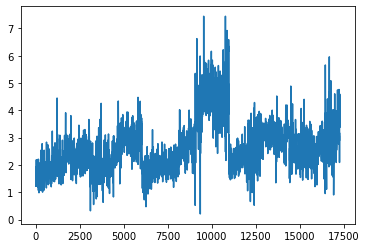

In [158]:
plt.plot(org_df["Energy (kWh)"][org_df.index.isin(y_test.index)])

In [164]:
y_pred = pd.DataFrame(y_pred, index = y_test.index).sort_index()

In [175]:
org = org_df["Energy (kWh)"]

In [178]:
def toNorm(s):
    i = s.index
    first = org.iloc[i - 2]
    diff = org.iloc[i - 1]
    diff = diff - first

    return first + diff + s
    

In [189]:
pred_norm = []
for i,s in y_pred.iterrows():
    first = org.iloc[i - 2]
    diff = org.iloc[i - 1]
    diff = diff - first
    pred_norm.append(first + diff + s)
    



In [202]:
pred_norm = pd.DataFrame(pred_norm)
test_norm = org_df["Energy (kWh)"][org_df.index.isin(y_test.index)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

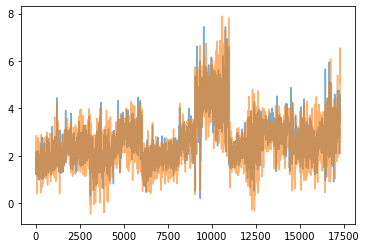

In [210]:
plt.plot(test_norm, alpha = 0.6)
plt.plot(pred_norm, alpha = 0.6)
plt.show()

In [207]:
r2_score(pred_norm, test_norm)

0.292746163987749

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

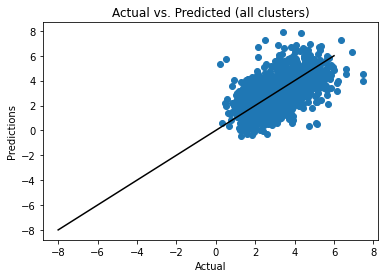

In [212]:
plt.scatter(test_norm, pred_norm)
plt.title("Actual vs. Predicted (all clusters)")
plt.ylabel("Predictions")
plt.xlabel("Actual")
x = np.linspace(0,6,100)
plt.plot(x,x, c = "black")
plt.show()